# Classification

<style>body {text-align: justify}</style>

## What is Classification

Classification consists in taking a vector of inputs X to produce a vector of outputs Y that will associate each input x to a class. The training data set is composed of the vector X of n observations (that can include d parameters), and Y the vector the associated true values. Dataset in the case of *supervised* machine learning : $ \mathcal{D} = \{(X_1,Y_1), ... ,(X_n,Y_n) \} \in \mathcal{X}^n, \mathcal{Y}^n $.

The classification algorithm will try to minimize a loss function in order to create a model that can predict the class of each entry with a certain level of precision. During the training phase, the true output is already defined and is given to the algorithm so it can learn how to differenciate those classes. Once the model is trained, it is supposed to be able to correctly predict those output for new values.

An example of classification could be to predict the added value of a new client : small, average, important. The input could include the type of client (individual or company), the location of the store in which they made their first purchase, the amount of their first purchase, the day of the week... The model will transform the input vector in a value corresponding to one of the classes. During the training phase, you should take data that already exists. 

## How does a classification model work? 

Once the data is correclty collected, cleaned and formated, you can proceed to develop and train a classification model. There are several algorithm that will help you to do this task. However, it is important to understand how they work under the hood, and the right way to use them.

### The loss function

As specified in the graphs above, one of the main part of the training process consist in comparing the predicted values to the true output. For a classification problem, this comparison is done by a loss function that can be defined as : 

$$
\mathcal{l}(Y,f(X)) = \sum_{i=1}^{n} 1_{Y_i \ne f(X_i)}
$$

$1_{Y_i \ne f(X_i)}$ is equal to $1$ when $Y_i \ne prediction$. Therefore, for each mistake that the model makes, the loss function is incremented of one unit. A model that correctly predicts every observation has a loss of 0, and a model that is always wrong has a loss equal to the number of entries in the dataset. We aim a finding a function $f$ such that $\mathcal{l}(Y,f(X))$ gets as close as possible to 0. 

Here is a simple example of a classification model : 

### 1. Training the model 
<center>
<img src="pictures/classificationTraining.png">
</center>

### 2. Predict new values 
<center>
<img src="./pictures/classificationPredictions.png">
</center>

### What are the mains challenges 

As classification greatly depends on the quality of the input, therefore the first challenge we encounter is to feed the model with the proper data and the right amount of information. Indeed, giving too much information to the model can lead to over-fitting, especially if the information is not independ. It will also take more time to train the model and to get precise results. On the other hand, by not giving enough data to the model, you won't be able to train it correctly and it will never reach a correct level of precision. 

## How to implement classification with python :

In this example, I will import the necessary packages as we go. This is supposed to help you understand in which situation and part of the process the different packages are useful. However, in reality, a good practice is to import all the packages in the first cell of the notebook. 


### Load the data 

Pandas and numpy are the main packages used for loading/creating data sets. However, in a real case scenario, you might need a specific package to access a data base (boto3, sql...) or to do data transformation. Then, download the data set : https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/download?datasetVersionNumber=1 and unzip the file and load it in python with pandas.

Once the dataset has correctly been loaded, it is necessary to spend time analysing it and manipulating the data in order to get a deep understanding of what is at stake. The previous chapter deals with how to clean and visualize the data. Here, the dataset is already clean enough and well structured for us to do a classification. Therefore, it is possible to start working on it directly. 

```python
import pandas as pd 
import numpy as np 

train = pd.read_csv("../datasets/trees/train.csv")
test = pd.read_csv("../datasets/trees/test.csv")

train.head()
```

In [1]:
import pandas as pd 
import numpy as np 

train = pd.read_csv("../datasets/trees/train.csv")
test = pd.read_csv("../datasets/trees/test.csv")

train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Cover_Type','Id']), train.Cover_Type, test_size=0.2)
le = LabelEncoder()
y_train_encode = le.fit_transform(y_train)
y_test_encode = le.transform(y_test)

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Cover_Type','Id']), train.Cover_Type, test_size=0.2)
le = LabelEncoder()
y_train_encode = le.fit_transform(y_train)
y_test_encode = le.transform(y_test)
```

### XGBoost Classifier 

XGBoost is one of the most popular $\textbf{gradient boosting}$ library and is particularly efficient when it comes to classification. It relies on a boosting technic, which belongs to ensemble technics, that consists in training different model sequentially so that a specific tree can learn from the mistakes made by the previous ones. 

More precisely, $\textbf{boosting}$ is a machine learning technique that combines multiple weak learners, i.e. simple models that are slightly better than random guessing, to create a single strong learner (complex model). It is an iterative process, during which each weak learner is trained on the mistakes of the previous weak learner. At the end of the process, the weak learners are then combined to create a final strong learner which is more accurate and powerful than any of the individual weak learners. Boosting is often used in ensemble learning methods to improve the accuracy of predictions, and models are added until there is no room left for improvement. 

Gradient boosting is an iterative technique based on boosting for optimizing a loss function by combining the output of multiple weak models. It works by sequentially adding a new model to the ensemble, each of which is trained to minimize the loss of the combined model on the training set. Let $f_1(x), ..., f_M(x)$ be weak models, and $F_m(x)$ the combined model after $m$ weak models have been added. The combined model, $F_m(x)$, is updated at each iteration $m$ using the following formula:

$$F_m(x) = F_{m-1}(x) + \alpha f_m(x)$$

where $\alpha$ is a parameter controlling the contribution of the new model. The parameter $\alpha$ is learned by minimizing an objective function, usually the mean squared error, on the training set:

$$
\alpha = \underset{\alpha}{\operatorname{argmin}} \sum_{i=1}^n \left[y_i - F_{m-1}(x_i) - \alpha f_m(x_i) \right]^2
$$

XGBoost works by using the gradient boosting technique, which is a sequential approach to building a predictive model. This technique is used to optimize a loss function by adding weak learners in a step-wise fashion. The algorithm works by first fitting a simple model to the data, then sequentially adding more weak learners to the model and updating the model parameters in order to minimize the loss function. Mathematically, XGBoost works by minimizing the following objective function:

$$
\underset{\theta}{min}\sum_{i=1}^{n}\left[ l\left(y_{i},\hat{y_{i}}\right) + \sum_{j=1}^{K}\Omega\left(f_{j}\right)\right]
$$

where $y_i$ is the target value for the $i^{th}$ data point, $\hat{y_i}$ is the predicted value, $K$ is the number of weak learners, $f_j$ is the $j^{th}$ weak learner, and $\Omega$ is the regularization term. The first term in the objective is the loss function which measures the discrepancy between the actual and predicted values. The second term is the regularization term which penalizes complex models.

You can learn more here : https://arxiv.org/pdf/1603.02754.pdf

```python
import xgboost as xgb

XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train, y_train_encode)

output_train = XGBClassifier.predict(X_train)
output_test = XGBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')
```

In [3]:
import xgboost as xgb

XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train, y_train_encode)

output_train = XGBClassifier.predict(X_train)
output_test = XGBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 99.0%
The accuracy on the test set is equal to 85.4%


```python
param_grid = {"max_depth":    [4,5,8,9],
              "n_estimators": [50,100,200],
              "learning_rate": [0.05,0.1]}

search = GridSearchCV(XGBClassifier, param_grid, cv=5,verbose=1).fit(X_train, y_train_encode)

print("The best hyperparameters are ",search.best_params_)
````

```python
bestXGBClassifier = xgb.XGBClassifier(learning_rate= 0.2, max_depth= 9, n_estimators= 300,reg_alpha=1 ) 
bestXGBClassifier.fit(X_train, y_train_encode)

output_train = bestXGBClassifier.predict(X_train)
output_test = bestXGBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

bestXGBClassifier.save_model("bestXGBClassifier.txt")
```

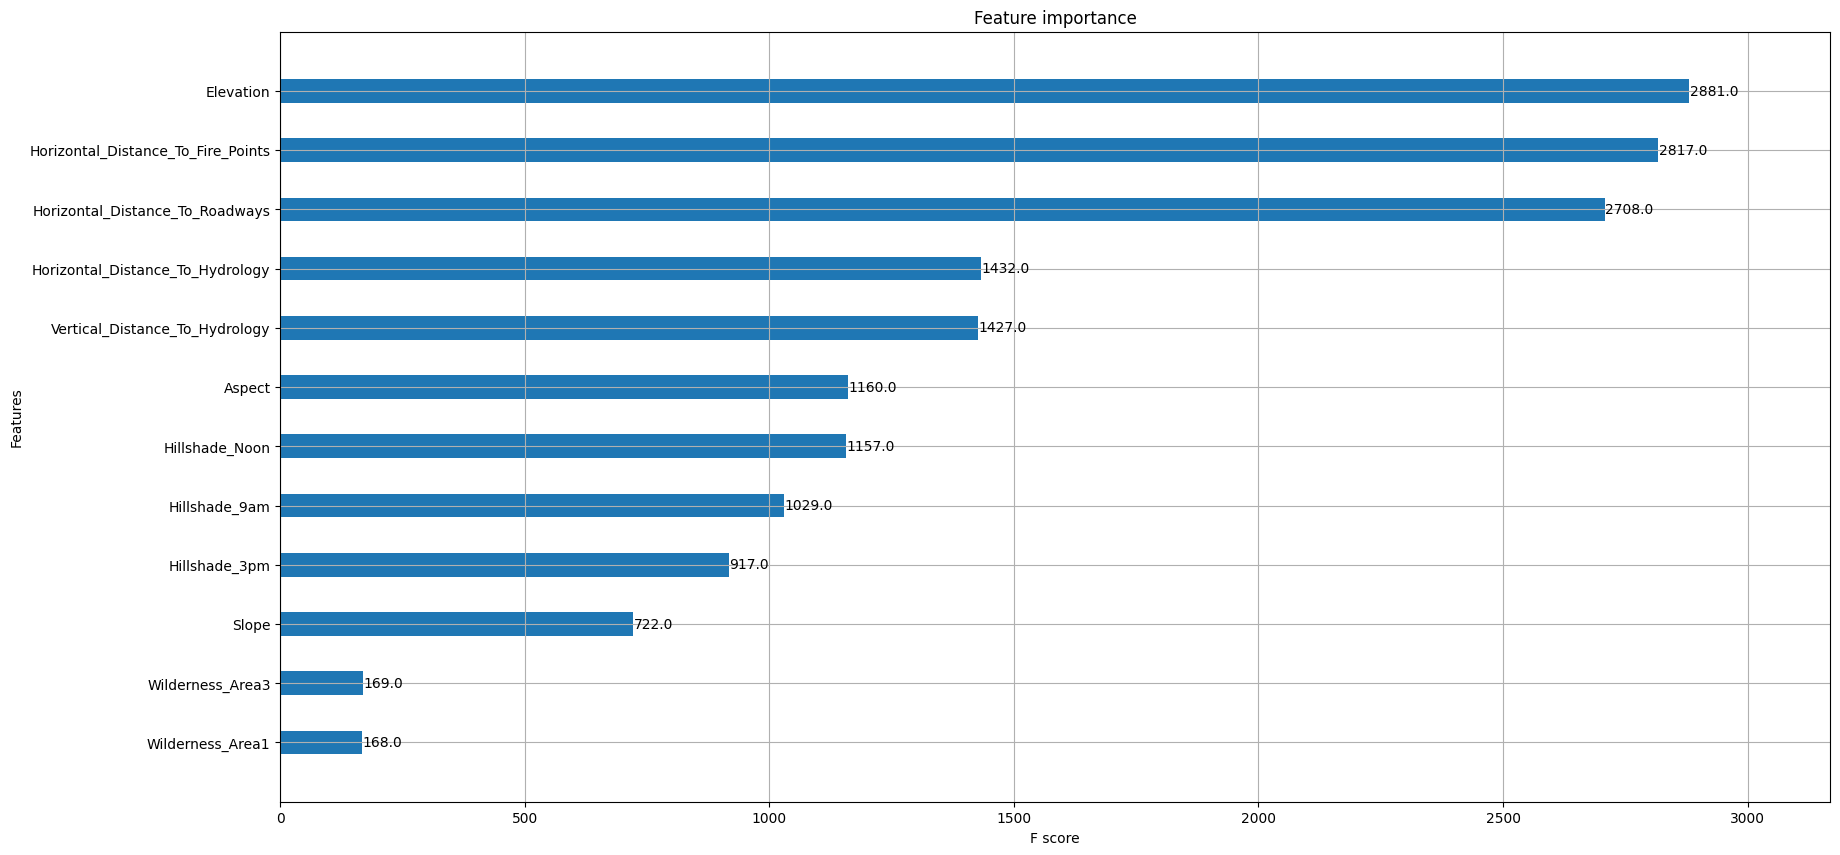

In [4]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1,figsize=(20,10))
xgb.plot_importance(XGBClassifier, ax = ax, height=0.4,max_num_features =12)
plt.show()

In [5]:
Cover_Type = XGBClassifier.predict(test.drop(columns=["Id"]))
predictions = pd.DataFrame({"Id":test.Id,"Predicted_Cover_Type":Cover_Type})
predictions["Predicted_Cover_Type"] = le.inverse_transform(predictions["Predicted_Cover_Type"])
#predictions.to_csv("data/XGBClassifierPredictions.csv",index=False)
predictions

,Id,Predicted_Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


Once your XGBoost model is trained, you can dump a human readable description of it into a text file:
```python
XGBClassifier.dump_model('dump.raw.txt')
```

### CatBoost Classifier 

CATBoost is another popular open-source machine learning algorithm based on gradient boosting, that was developed by Yandex in 2017. The main difference between XGBoost and CATboost is that XGBoost is a general-purpose boosting algorithm, while CATboost is a specialized algorithm designed to handle categorical features. CATboost is in a way a specialized version of XGBoost which has been optimized for working with categorical features. It uses a technique called ordered boosting, which is specifically designed to handle categorical features. This allows it to better handle data with high cardinality and missing values. It also uses a specialized algorithm for calculating the feature importance, which is better suited for categorical features. 

```python
from catboost import CatBoostClassifier

CATBClassifier = CatBoostClassifier(silent=True)
CATBClassifier.fit(X_train, y_train_encode)

output_train = CATBClassifier.predict(X_train)
output_test = CATBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')
```

In [6]:
from catboost import CatBoostClassifier

CATBClassifier = CatBoostClassifier(silent=True)
CATBClassifier.fit(X_train, y_train_encode)

output_train = CATBClassifier.predict(X_train)
output_test = CATBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 94.8%
The accuracy on the test set is equal to 84.7%


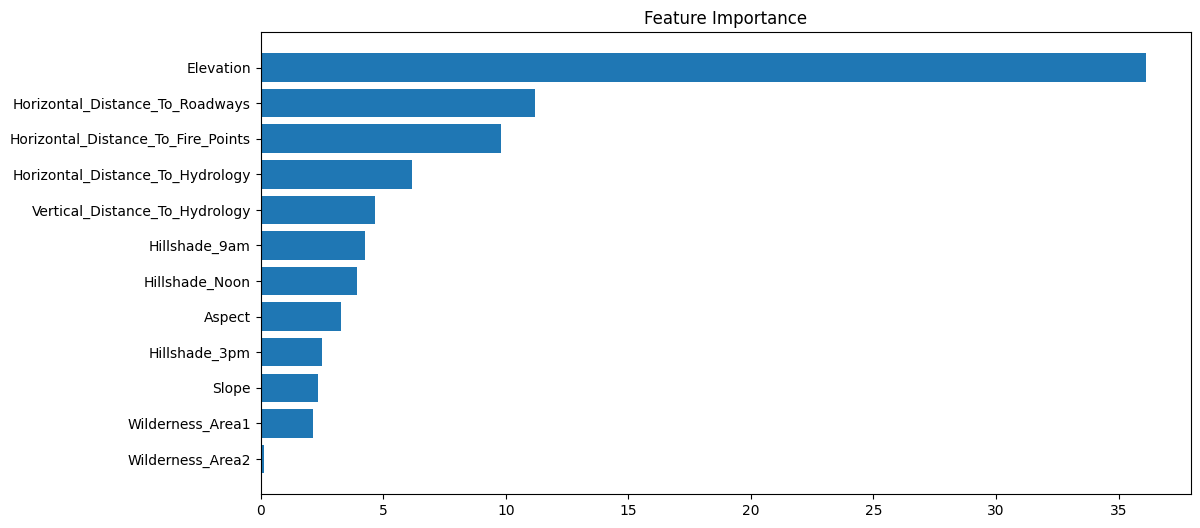

In [7]:
feature_importance = CATBClassifier.feature_importances_[:12]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

```python
param_grid = {"random_strength":[3,4],
              "l2_leaf_reg":[3,4],
              "max_depth":[10,11],
              "learning_rate":[0.17,0.23]}

search = GridSearchCV(CATBClassifier , param_grid, cv=3, verbose=3).fit(X_train, y_train_encode)

print("The best hyperparameters are ",search.best_params_)
BestCATBClassifier = CatBoostClassifier(learning_rate= 0.2, max_depth= 10,l2_leaf_reg= 3, random_strength= 3,silent=True)
BestCATBClassifier.fit(X_train, y_train_encode)

output_train = BestCATBClassifier.predict(X_train)
output_test = BestCATBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')
```

### KNN (K Nearest Neighbors)

#### What is KNN

K Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for both classification and regression tasks. It is a non-parametric algorithm meaning that it does not make assumptions about the underlying data distribution. The KNN algorithm works by finding the ‘K’ closest data points in the training data set and then using them to make predictions about new data points. The prediction is based on the majority of the ‘K’ closest data points. 

To classify a new data point, KNN finds the ‘K’ closest data points in the training set and determines the class of the new data point based on the majority vote of the ‘K’ closest points. For regression tasks, the KNN algorithm finds the ‘K’ closest data points and then calculates the average value of the ‘K’ closest points to predict the value of the new data point. 

KNN is a simple yet powerful algorithm for both classification and regression tasks. It is easy to understand and implement and does not require any assumptions about the data distribution. It also does not require much tuning of the parameters, making it an attractive option for many machine learning tasks. 

However, the KNN algorithm does have some drawbacks. It can be computationally expensive and can be sensitive to outliers in the data set. It also tends to overfit data when the number of neighbors is too large. Despite these drawbacks, KNN remains a popular choice for many machine learning tasks.

Let $x_i$ be a training data point with $n$ features and let $y_i$ be the corresponding label. For an unseen test point $x_j$, the KNN algorithm assigns the label $y_j$ according to the following formula:

$$
y_j = \frac{1}{k}\sum_{i=1}^{k}y_i
$$

where $k$ is the number of nearest neighbors. The distance between a training point $x_i$ and the test point $x_j$ is computed using a distance metric such as Euclidean distance. The KNN algorithm assigns the label of the most common class among the k-nearest neighbors.


Recall that the Euclidean distance between p and q in $n$ dimensions is defined as:

$$
d(p,q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
$$
$$
\text{with $q_i - p_i$ the distance between the $i^{th}$ feature}
$$

*Note : in 2 dimensions, it corresponds to the pythagorian theorem.*

#### KNN with python

Now let's see how to implement KNN in Python. First, we create a dataset with 3 features and 3 classes. This can represent 3 groups of customers, each of wich is based on 3 paramters, the age, the location, and the time since the last purchase for instance. This is our labeled data. We know want to predict in wich group a new customer will be. This new customer is represented in yellow below.  

In [8]:
from collections import Counter
from sklearn.datasets import make_classification

#Here we will work only with X in 3 dimensions, with only 3 useful features 
X,y = make_classification(n_samples=200,n_features=3, n_informative=3, n_redundant=0, n_classes=3,n_clusters_per_class=1,class_sep=5,random_state=3) 
X[:,0] = X[:,0].astype('int')+30
X[:,1] = X[:,1].astype('int')
X[:,2] = X[:,2].astype('int')+10

data = pd.DataFrame({"Age":X[:,0],"Location":X[:,1],"Last purchase":X[:,2],"class":y})
print("The dataset containing information about customers: ")
data.head()


The dataset containing information about customers: 


,Age,Location,Last purchase,class
0,35.0,5.0,5.0,0
1,36.0,4.0,9.0,0
2,36.0,5.0,5.0,0
3,25.0,4.0,5.0,2
4,35.0,5.0,15.0,1


```python 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
# plot
sc = ax.scatter(X[:,0], X[:,1], X[:,2], s=30, c=y, cmap=cmap, marker="o", alpha=1)
ax.scatter(32,5,5,c='yellow', s=155, marker="X",edgecolors='black')
ax.set_xlabel('Age')
ax.set_ylabel('Location')
ax.set_zlabel('Weeks since last purchase')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="Class")
plt.title("Dataset in 3D space")
# save
plt.show()
```

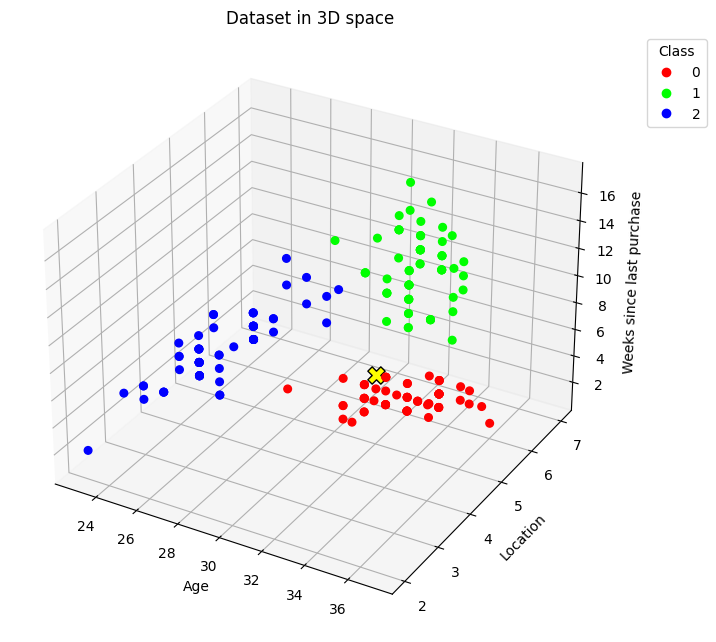

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
# plot
sc = ax.scatter(X[:,0], X[:,1], X[:,2], s=30, c=y, cmap=cmap, marker="o", alpha=1)
ax.scatter(32,5,5,c='yellow', s=155, marker="X",edgecolors='black')
ax.set_xlabel('Age')
ax.set_ylabel('Location')
ax.set_zlabel('Weeks since last purchase')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="Class")
plt.title("Dataset in 3D space")
# save
plt.show()

```python 
# KNN Model from scratch : 

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        # We start by computing the distances 
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Then we sort by distance 
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]

        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
```

In [10]:
# KNN Model from scratch : 

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        # We start by computing the distances 
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Then we sort by distance 
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]

        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

```python 
# KNN Model with Sklearn, and comparison :
from sklearn.neighbors import KNeighborsRegressor

knn_model_Scratch = KNN(k=3)
knn_model_SKlearn = KNeighborsRegressor(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

knn_model_Scratch.fit(X_train, y_train)
knn_model_SKlearn.fit(X_train, y_train)

new_customer_data = [(32,5,5)]

predictions_Scratch = knn_model_Scratch.predict(new_customer_data)
predictions_SKlearn = knn_model_SKlearn.predict(new_customer_data)

print("The model from scratch predicted the class: ", predictions_Scratch)
print("The model from sklearn predicted the class: ", predictions_SKlearn)

print("The accuracy of scratch model is: ", 
    accuracy_score(y_test,knn_model_Scratch.predict(X_test)))
print("The accuracy of sklearn model is: ", 
    accuracy_score(y_test,knn_model_SKlearn.predict(X_test)))
```

In [11]:
# KNN Model with Sklearn, and comparison :
from sklearn.neighbors import KNeighborsRegressor

knn_model_Scratch = KNN(k=3)
knn_model_SKlearn = KNeighborsRegressor(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model_Scratch.fit(X_train, y_train)
knn_model_SKlearn.fit(X_train, y_train)

new_customer_data = [(32,5,5)]

predictions_Scratch = knn_model_Scratch.predict(new_customer_data)
predictions_SKlearn = knn_model_SKlearn.predict(new_customer_data)

print("The model from scratch predicted the class: ", predictions_Scratch)
print("The model from sklearn predicted the class: ", predictions_SKlearn)

print("The accuracy of scratch model is: ", accuracy_score(y_test,knn_model_Scratch.predict(X_test)))
print("The accuracy of sklearn model is: ", accuracy_score(y_test,knn_model_SKlearn.predict(X_test)))

The model from scratch predicted the class:  [0]
The model from sklearn predicted the class:  [0.]
The accuracy of scratch model is:  1.0
The accuracy of sklearn model is:  1.0
